#Theory

In the following assignment, your task is to complete the MNIST Basics chapter. It is best to repeat everything from last week and try to answer the following questions. Afterwards you have to summarize the learned facts with two programming tasks.

**What is "torch.cat()" and ".view(-1, 28*28)" doing in the beginning of the "The MNIST Loss Function" chapter?**

`torch.cat()`:
- Concetanate all given tensors into a single tensor

`torch.view(-1,28*28)`:
- Change the tensor from a list of matrices (rank 3 tensor) to a list of vectors (rank 2 tensor)
- create tensor with 28*28 columns and flexible number of rows (as many as needed)
- adjusts the shape not the content of a tensor
- pararmeter "-1" --> flexible axis size
- Output with `view(-1,28*28)` --> `torch.Size([12396, 784])`
  - Output without --> `torch.Size([12396, 28, 28])`

**Can you draw the neuronal network, which is manually trained in chapter "The MNIST Loss Function"?**

???

**Why is it not possible to use the accuracy as loss function?**

*Reminder: How would accuracy loss function work: In this case, we would calculate our prediction for each image, collect these values to calculate an overall accuracy, and then calculate the gradients of each weight with respect to that overall accuracy
Why is it not possible to use the accuracy as loss function?*

- Answer: We need gradients to improve our model using Stochastic Gradient descent. Loss Function is used to calculate the gradients. With the accuracy loss function the gradient of a function is the slope. Since `Mnist_loss` always assumes predictions are between 0 and 1, small changes in weights doesn't change the prediction. This would mean that gradient is mostly equal to zero. So, accuracy is a constant almost everywhere, but at treshold (e.g. 0.5). So further away from threshold the derivate of the function is mostly 0, or infinite at treshold. Both Values are useless for improving the models performance.

**What is the defined `mnist_loss` function doing?** 

```
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()
```
`torch.where(a,b,c)` is a vectorized form of a conditiaonl statement, in this case:
- targets==1 --> Condition
- 1-predictions 
- predictions

Measures how far away predictions are away from 1 if it should be one (1-predictions) or how far from 0 if it should be 0 (predictions). And takes the mean of all.


**Why do we need additionaly the sigmoid() function? What is it technically in our TLU?**

Sigmoid function smoohes all values into an output value between 0 and 1 (similar to Logistic regression function). Using Sigmoid, we can be sure that higher preditiction corresponds to higher confidence an image is a 3. Therefore, our function is sensible to small changes in weight


**Again, what are mini batches, why are we using them and why should they be shuffeld?**

- mini batches: Chunks of the dataset --> faster to process
  - however, they must be big enough to get more accuracte and stable results
- to limit overfitting, shuffeling the data that comes in a mini batch is recommended --> increase generalization
  - we want to include randomly but equally distributed predictions and target variables 

#Practical Part

Try to understand all parts of the code needed to manually train a single TLU/Perceptron, so use and copy all parts of the code from "First Try: Pixel Similarity" to the "Putting it all together" chapter. In the second step, use an optimizer, a second layer, and a ReLU as a hidden activation function to train a simple neural network. When copying the code, think carefully about what you really need and how you can summarize it as compactly as possible. (Probably each attempt requires about 15 lines of code.)

##### Data Import

In [1]:
from sklearn.model_selection import train_test_split

from sklearn import datasets
iris = datasets.load_iris()

#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')



path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
#Label threes as 1 and sevens as 0; Length of list of threes is equal to images of threes
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

#Stack each image into TorchTensors 
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
#Converts Float type values into values of range [0,1]
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

##### Seven Processing Steps 

To be more specific, here are the steps that we are going to require, to turn this function into a machine learning classifier:

1. *Initialize* the weights.
2. For each image, use these weights to *predict* whether it appears to be a 3 or a 7.
3. Based on these predictions, calculate how good the model is (its *loss*).
4. Calculate the *gradient*, which measures for each weight, how changing that weight would change the loss
5. *Step* (that is, change) all the weights based on that calculation.
6. Go back to the step 2, and *repeat* the process.
7. Iterate until you decide to *stop* the training process (for instance, because the model is good enough or you don't want to wait any longer).

In [ ]:



#1. Initialize random weight for every pixel
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

#2. Matrix Multiplication
def linear1(xb): return xb@weights + bias

#3. Calculate Loss using Sigmoid loss function
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

#4. Gradient using Stocastic Gradient Descent
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

#5. Update weights and biases based on gradient and learning rate
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

# 5.1 Calculate Validation accuracy
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

# 5.2 Put Batches back together
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)


#6. Input Weights and Bias (random)
weights = init_params((28*28,1))
bias = init_params(1)



#Initializes DataLoader for creating "train" mini batches
# DL --> DataLoader creates and shuffles miniBatches
dl = DataLoader(list(zip(train_x,train_y)), batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

#Initializes DataLoader for creating "test" mini batches
valid_dl = DataLoader(list(zip(valid_x,valid_y)), batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape


#7. Train 20 Epochs 
lr = 1.0
params = weights,bias
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')



0.4922 0.4937 0.4946 0.4946 0.4946 0.4946 0.4946 0.4946 0.4946 0.4966 0.793 0.7577 0.8969 0.9291 0.9407 0.9476 0.9549 0.9593 0.9603 0.9632 

Explanation:

`nn.sequential`: creates simple NN with 3 layers 
1. `Linear(28*28, 30)`: Takes in picture with 28*28 pixels and outputs a tensor of size 30. Learns with linear transformation
2. `ReLu`: Non linear activation function --> sets any negative input tensor to zero and keep positive values unchanged 
3. `Linear(30,1)`: Takes in tensor of size 30 and outputs a single value

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.171807,0.491680,0.504416,00:00
1,0.092028,0.184082,0.824338,00:00
2,0.044444,0.102703,0.906281,00:00
3,0.027300,0.072628,0.930815,00:00
4,0.019696,0.058570,0.944553,00:00
5,0.015919,0.050517,0.953386,00:00
6,0.013889,0.045536,0.958292,00:00
7,0.012617,0.042327,0.959764,00:00
8,0.011653,0.040079,0.962709,00:00
9,0.010850,0.038203,0.963199,00:00


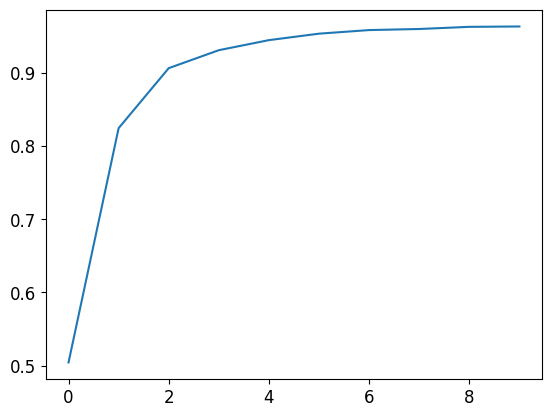

In [ ]:
#YOUR TASK: Train a simple two-layer neural network (two perceptrons + hidden activation function) with built-in functions and an optimizer.

#Simple NN with three layers and ReLu Activation Function
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

#Loss Function
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()


# 5.1 Calculate Validation accuracy
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()



#Initializes DataLoader for creating "train" mini batches
dl = DataLoader(list(zip(train_x,train_y)), batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

#Initializes DataLoader for creating "test" mini batches
valid_dl = DataLoader(list(zip(valid_x,valid_y)), batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape


#Optimizer 
learn = Learner(DataLoaders(dl, valid_dl), simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

learn.fit(10, lr=lr)

plt.plot(L(learn.recorder.values).itemgot(2));